# Process house prices and store them on LSOA level

This notebook processes a dataset containing a time-series of house price per LSOA and saves it as a GeoPackage for future use.

In [4]:
import datetime

import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
data_folder = "/Users/martin/Library/CloudStorage/OneDrive-SharedLibraries-TheAlanTuringInstitute/Daniel Arribas-Bel - demoland_data"

Specify paths to existing files, some of which need to be downloaded manually (see Notes).

- https://www.ons.gov.uk/peoplepopulationandcommunity/housing/datasets/medianpricepaidbylowerlayersuperoutputareahpssadataset46
- https://geoportal.statistics.gov.uk/datasets/2fb4e13605cb4745992390165307697e_0/explore?location=52.755877%2C-2.489798%2C7.62

In [34]:
lsoa_list_file = f"{data_folder}/tynewear_lsoas_list.csv"  # list of LSOAs within AoI

# national level files
house_prices_lsoa_xls_file = f"{data_folder}/hpssadataset46medianpricepaidforresidentialpropertiesbylsoa.xlsx" # excel spreadsheet downloaded from gov website (see Notes) with median house prices, quarterly data from Dec 1995
LSOA_boundaries_file = f"{data_folder}/LSOA_(Dec_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.geojson" # administrative boundaries from gov.uk OS


Read house prices for whole country. The actual table starts with row 5 in sheet "Data". ONS uses `:` to indicate missing value so we shall filter it on import.

In [43]:
house_prices = pd.read_excel(house_prices_lsoa_xls_file, "Data", header=5, na_values=":")

Read LSOA boundaries to link to data.

In [45]:
lsoa = gpd.read_file(LSOA_boundaries_file)

Check structure before merge.

In [46]:
lsoa.head()

,OBJECTID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,GlobalID,geometry
0,1,E01000001,City of London 001A,City of London 001A,532129,181625,-0.097060,51.51810,157794.481079,1685.391778,b12173a3-5423-4672-a5eb-f152d2345f96,"POLYGON ((-0.09474 51.52060, -0.09546 51.51544..."
1,2,E01000002,City of London 001B,City of London 001B,532480,181699,-0.091970,51.51868,164882.427628,1804.828196,90274dc4-f785-4afb-95cd-7cc1fc9a2cad,"POLYGON ((-0.08810 51.51941, -0.09546 51.51544..."
2,3,E01000003,City of London 001C,City of London 001C,532245,182036,-0.095230,51.52176,42219.805717,909.223277,7e89d0ba-f186-45fb-961c-8f5ffcd03808,"POLYGON ((-0.09453 51.52205, -0.09274 51.52139..."
3,4,E01000005,City of London 001E,City of London 001E,533581,181265,-0.076280,51.51452,212682.404259,2028.654904,a14c307a-874c-4862-828a-3b1486cc21ea,"POLYGON ((-0.07589 51.51590, -0.07394 51.51445..."
4,5,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,544994,184276,0.089318,51.53876,130551.387161,1716.896118,65121a2d-3d2b-4935-9712-690f2993cfd2,"POLYGON ((0.09328 51.53787, 0.09363 51.53767, ..."


In [47]:
house_prices.head()

,Local authority code,Local authority name,LSOA code,LSOA name,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,...,Year ending Mar 2020,Year ending Jun 2020,Year ending Sep 2020,Year ending Dec 2020,Year ending Mar 2021,Year ending Jun 2021,Year ending Sep 2021,Year ending Dec 2021,Year ending Mar 2022,Year ending Jun 2022
0,E06000001,Hartlepool,E01011949,Hartlepool 009A,34750.0,34500.0,30500.0,30000.0,29950.0,29000.0,...,89000.0,84000.0,88000.0,88000.0,81500.0,80500.0,85500.0,100750.0,100000.0,121000.0
1,E06000001,Hartlepool,E01011950,Hartlepool 008A,25000.0,25000.0,25300.0,25625.0,25000.0,24800.0,...,27000.0,26000.0,28500.0,30000.0,33000.0,47000.0,50079.0,50159.0,50159.0,49000.0
2,E06000001,Hartlepool,E01011951,Hartlepool 007A,27000.0,27000.0,27250.0,28950.0,28500.0,28950.0,...,40000.0,29425.0,30000.0,50000.0,51500.0,53000.0,58573.5,60000.0,61499.5,60000.0
3,E06000001,Hartlepool,E01011952,Hartlepool 002A,44500.0,44500.0,30000.0,26675.0,26000.0,25500.0,...,70000.0,66475.0,85000.0,85000.0,NaN,83500.0,83000.0,80000.0,75500.0,75000.0
4,E06000001,Hartlepool,E01011953,Hartlepool 002B,22000.0,27000.0,27000.0,20600.0,20000.0,19500.0,...,58000.0,60000.0,NaN,NaN,NaN,NaN,NaN,90000.0,NaN,95000.0


Merge the data on LSOA codes.

In [48]:
lsoa = lsoa.merge(house_prices, right_on="LSOA code", left_on="LSOA11CD", how="left")

Read the list of LSOA belonging to the area of interest.

In [49]:
tyne_lsoa = pd.read_csv(lsoa_list_file, index_col=0)

Filter the whole country.

In [51]:
tyne_prices = lsoa[lsoa.LSOA11CD.isin(tyne_lsoa["LSOA code"])]

In [54]:
tyne_prices.head()

,OBJECTID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,...,Year ending Mar 2020,Year ending Jun 2020,Year ending Sep 2020,Year ending Dec 2020,Year ending Mar 2021,Year ending Jun 2021,Year ending Sep 2021,Year ending Dec 2021,Year ending Mar 2022,Year ending Jun 2022
7948,7949,E01008162,Gateshead 027A,Gateshead 027A,426408,562669,-1.58915,54.95797,4.337674e+05,2795.514484,...,124000.0,107500.0,97000.0,97000.0,100000.0,137260.0,137510.0,107000.0,108250.0,99500.0
7949,7950,E01008163,Gateshead 028A,Gateshead 028A,425687,562359,-1.60044,54.95522,3.886396e+05,2960.341729,...,113500.0,105000.0,124000.0,138000.0,138975.0,138000.0,121500.0,107000.0,107000.0,115000.0
7950,7951,E01008164,Gateshead 027B,Gateshead 027B,426855,562213,-1.58222,54.95385,1.853580e+05,2097.848575,...,76250.0,87500.0,66475.0,62000.0,60000.0,56250.0,65000.0,84925.0,125000.0,140000.0
7951,7952,E01008165,Gateshead 011A,Gateshead 011A,426340,562156,-1.59026,54.95336,2.549571e+05,2523.273552,...,79250.0,81250.0,83250.0,105000.0,120000.0,123500.0,147250.0,119500.0,112630.0,125260.0
7952,7953,E01008166,Gateshead 027C,Gateshead 027C,426244,563319,-1.59166,54.96382,1.412473e+06,4863.402280,...,145750.0,149000.0,145975.0,136000.0,139025.0,138050.0,139025.0,150500.0,173500.0,177000.0


Simplify columns names

In [55]:
tyne_prices.columns = [c.replace("Year ending ", "") for c in tyne_prices.columns]

In [57]:
tyne_prices.columns

Index(['OBJECTID', 'LSOA11CD', 'LSOA11NM', 'LSOA11NMW', 'BNG_E', 'BNG_N',
       'LONG', 'LAT', 'Shape__Area', 'Shape__Length',
       ...
       'Mar 2020', 'Jun 2020', 'Sep 2020', 'Dec 2020', 'Mar 2021', 'Jun 2021',
       'Sep 2021', 'Dec 2021', 'Mar 2022', 'Jun 2022'],
      dtype='object', length=123)

Save to GeoPackage

In [59]:
tyne_prices.reset_index(drop=True).to_file(f"{data_folder}/house_prices_lsoa_jun22.gpkg")

Quickly check the distribution. Housing prices are often better to model as log.

<AxesSubplot: ylabel='Frequency'>

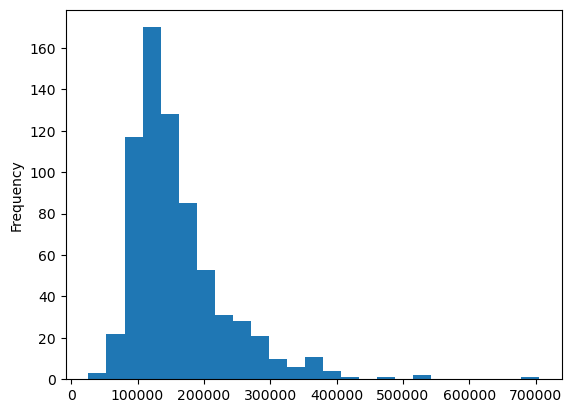

In [65]:
tyne_prices['Jun 2022'].plot.hist(bins=25)

There is a long tail but not that critical. Let's check logged.

<AxesSubplot: ylabel='Frequency'>

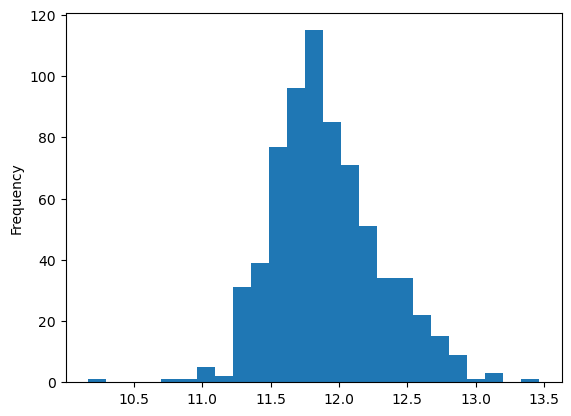

In [66]:
np.log(tyne_prices['Jun 2022']).plot.hist(bins=25)

Now we have some outliers on lower end. Will need to decide how to pass the data to the modelling process, some additional preprocessing may be needed.

In [68]:
tyne_prices['Jun 2022'].describe()

count       694.000000
mean     160843.278818
std       72681.078875
min       26000.000000
25%      114612.500000
50%      139972.500000
75%      186937.500000
max      705500.000000
Name: Jun 2022, dtype: float64

The problem with this dataset is that it is not normalised, so we have values per whole house without acknowledging its size or any other variable.

We can potentially get other measures - mean, lower quartile and tenth percentile price, plus counts of sales per type but at this level of aggregation, it probably won't help a lot. The optimal would be a measure per sq.m. or access to other variables allowing us to model it but that does not seem to be available. 

## A new attribute-linked residential property price dataset for England and Wales 2011-2019

We can use https://reshare.ukdataservice.ac.uk/854942/ that derived a price per sqm from link between sales data and EPC.

In [1]:
# It is 6.3GB...
linked_epc_path = "https://reshare.ukdataservice.ac.uk/854942/1/tranall2011_19.csv"

Filter only Tyne and Wear for the last two years (2018-19).

In [ ]:
epc = pd.read_csv(linked_epc_path)
epc["dateoftransfer"] = pd.to_datetime(epc.dateoftransfer)
last2years = epc[epc.dateoftransfer > datetime.datetime(2018, 1, 1)]
tyne = last2years[last2years.county == 'TYNE AND WEAR']
tyne

/tmp/ipykernel_3533493/3103178836.py:1: DtypeWarning: Columns (40,60) have mixed types. Specify dtype option on import or set low_memory=False.
  epc = pd.read_csv("https://reshare.ukdataservice.ac.uk/854942/1/tranall2011_19.csv")


,id,transactionid,oa11,postcode,price,dateoftransfer,propertytype,oldnew,duration,paon,...,MAIN_FUEL,WIND_TURBINE_COUNT,HEAT_LOSS_CORRIDOOR,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL
938059,12825134,{8A78B2B0-1AE4-5CB0-E053-6B04A8C0F504},E00042737,NE3 1QX,162000.0,2019-04-24,F,N,L,132,...,mains gas (not community),0,no corridor,NaN,3.07,0.0,NaN,natural,Newcastle upon Tyne,Newcastle upon Tyne North
938062,12825155,{75050A85-C3A2-9A88-E053-6B04A8C02390},E00042719,NE3 4RQ,363200.0,2018-08-02,T,N,F,2,...,mains gas (not community),0,NO DATA!,NaN,NaN,NaN,N,natural,Newcastle upon Tyne,Newcastle upon Tyne Central
938067,12825169,{75050A85-C385-9A88-E053-6B04A8C02390},E00042710,NE3 1NN,205000.0,2018-07-18,F,N,L,FERNDENE COURT,...,mains gas (not community),0,unheated corridor,7.8,NaN,NaN,N,natural,Newcastle upon Tyne,Newcastle upon Tyne North
938068,12825170,{68FEB20C-0D16-38DA-E053-6C04A8C051AE},E00042820,NE4 6BA,160000.0,2018-03-15,F,N,L,BARRACK COURT,...,mains gas - this is for backwards compatibilit...,0,no corridor,NaN,2.28,0.0,N,natural,Newcastle upon Tyne,Newcastle upon Tyne Central
938082,12825219,{79A74E22-3FBD-1289-E053-6B04A8C01627},E00042388,NE3 2HA,176500.0,2018-09-24,F,N,L,46,...,mains gas (not community),0,no corridor,NaN,NaN,NaN,N,natural,Newcastle upon Tyne,Newcastle upon Tyne North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543044,14846632,{8F1B26BE-496B-53DB-E053-6C04A8C03649},E00041827,NE40 3RT,200000.0,2019-07-16,T,N,L,15,...,mains gas (not community),0,NO DATA!,NaN,NaN,NaN,N,natural,Gateshead,Blaydon
1543047,14846641,{965B6D91-FF99-95E4-E053-6C04A8C07729},E00041731,NE10 9SA,135000.0,2019-10-04,S,N,L,55,...,mains gas (not community),0,NO DATA!,NaN,NaN,NaN,N,natural,Gateshead,Gateshead
1543048,14846652,{8F1B26BE-47B9-53DB-E053-6C04A8C03649},E00041511,NE9 7TQ,179950.0,2019-07-05,D,N,F,1,...,mains gas (not community),0,NO DATA!,NaN,NaN,NaN,N,natural,Gateshead,Gateshead
3053559,3043457,{93E6821E-E6ED-40FD-E053-6B04A8C0C1DF},E00104805,NE17 7TB,310000.0,2019-09-09,D,N,F,SCHOOL HOUSE,...,bulk wood pellets,0,NO DATA!,NaN,NaN,NaN,N,natural,County Durham,North West Durham


Link to geometry

In [ ]:
oa = gpd.read_file("https://borders.ukdataservice.ac.uk/ukborders/easy_download/prebuilt/shape/infuse_oa_lyr_2011_clipped.zip")
tyne_agg = tyne[['oa11', 'priceper', 'numberrooms', 'price', 'tfarea']].groupby('oa11').mean().reset_index()
tyne_oa = oa.merge(tyne_agg, left_on="geo_code", right_on="oa11", how="inner")
tyne_oa

ERROR 1: PROJ: proj_create_from_database: Open of /home/martin/mambaforge/envs/ulce/share/proj failed


,geo_code,geometry,oa11,priceper,numberrooms,price,tfarea
0,E00042786,"POLYGON ((428997.799 566018.331, 428998.491 56...",E00042786,1717.546956,5.666667,203158.333333,124.333333
1,E00042707,"POLYGON ((424221.655 568003.052, 424221.754 56...",E00042707,2933.816547,4.066667,341234.066667,124.475333
2,E00042703,"POLYGON ((419858.836 565454.433, 419858.374 56...",E00042703,1608.132502,3.777778,126666.666667,84.666667
3,E00042782,"POLYGON ((428932.199 566299.133, 428933.629 56...",E00042782,1864.265091,5.000000,179833.333333,99.056667
4,E00042789,"POLYGON ((428853.730 565689.295, 428860.602 56...",E00042789,1814.122597,3.857143,136528.571429,75.697143
...,...,...,...,...,...,...,...
3510,E00041811,"POLYGON ((428782.519 562282.321, 428783.470 56...",E00041811,1660.067873,5.000000,147500.000000,86.000000
3511,E00041818,"POLYGON ((416764.269 564158.045, 416764.216 56...",E00041818,2616.513428,4.333333,222333.333333,81.800000
3512,E00041898,"POLYGON ((423738.129 560286.484, 423738.500 56...",E00041898,1538.080092,4.250000,124487.500000,81.070000
3513,E00041819,"POLYGON ((415843.233 564846.473, 415868.526 56...",E00041819,2719.109422,3.750000,202417.000000,75.750000


In [ ]:
tyne_oa.to_file(f"{data_folder}/price_per_sqm.gpkg", engine='pyogrio')

<AxesSubplot: >

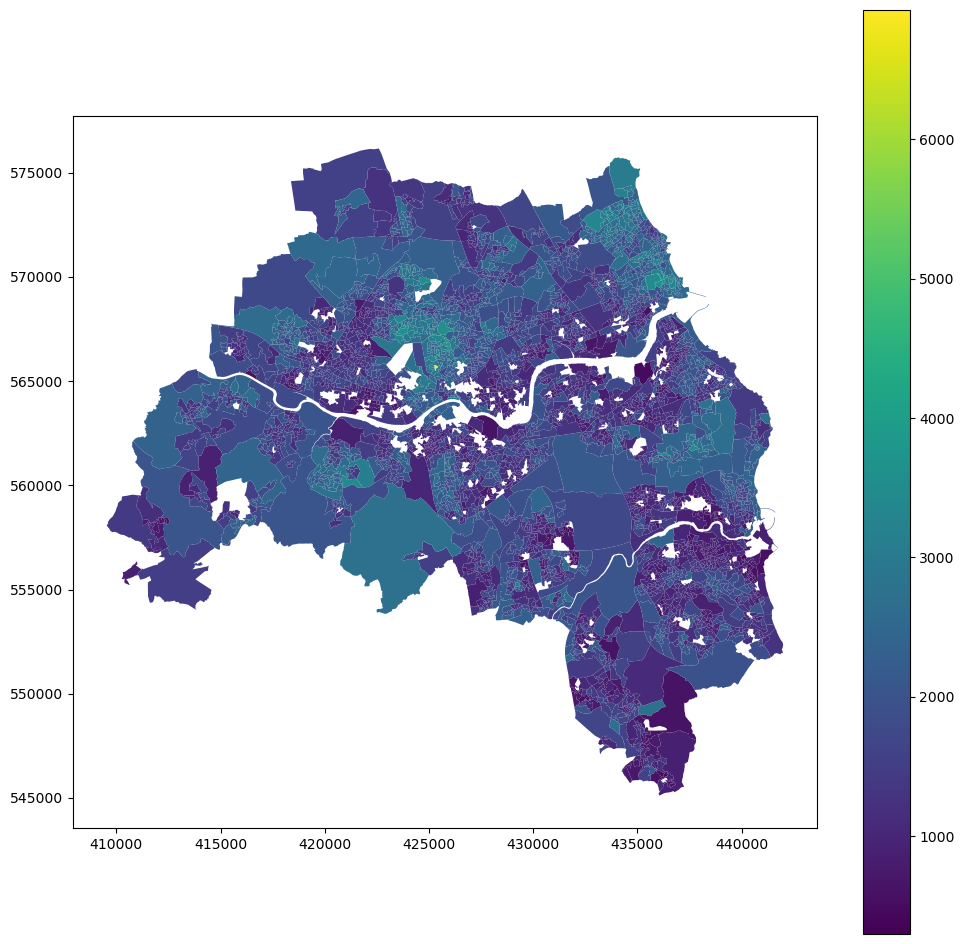

In [10]:
tyne_oa.plot("priceper", figsize=(12, 12), legend=True)

<AxesSubplot: ylabel='Frequency'>

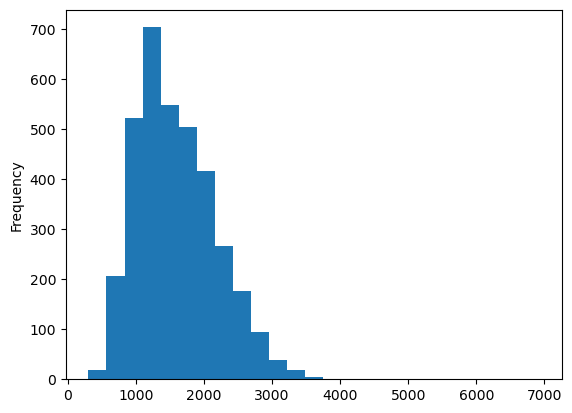

In [12]:
tyne_oa.priceper.plot.hist(bins=25)

<AxesSubplot: ylabel='Frequency'>

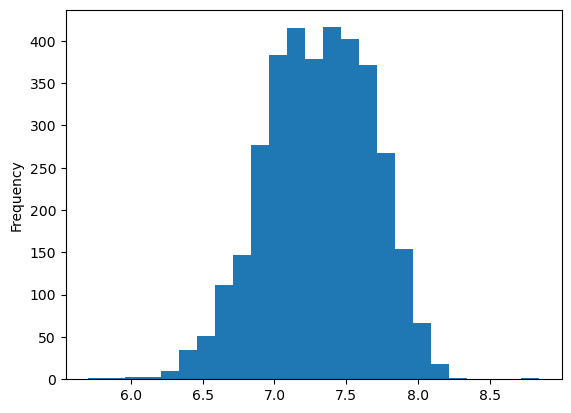

In [13]:
np.log(tyne_oa.priceper).plot.hist(bins=25)

We should be comfortably able to model log of price per sqm here.